# Credit Risk Analysis

### Load Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
cust_df = pd.read_csv('customer_data.csv')

In [3]:
cust_df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
cust_df.shape

(1125, 13)

In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [6]:
cust_df.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


### Data Preprocessing

In [7]:
print(cust_df.isnull().sum())

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64


In [8]:
cust_df["label"].value_counts()

0    900
1    225
Name: label, dtype: int64

In [9]:
low_risk=cust_df[cust_df["label"]==0]
high_risk=cust_df[cust_df["label"]==1]
frac=len(high_risk)/float(len(low_risk))
frac

0.25

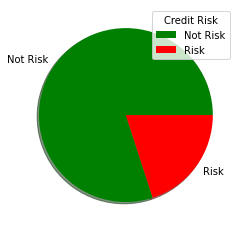

In [10]:
#visualising the "label" column 
plt.pie(cust_df["label"].value_counts(),labels = ["Not Risk","Risk"],colors = ["g","r"],shadow = True)
plt.legend(title ="Credit Risk")
plt.show() 
#This shows that the dataset is Imbalanced


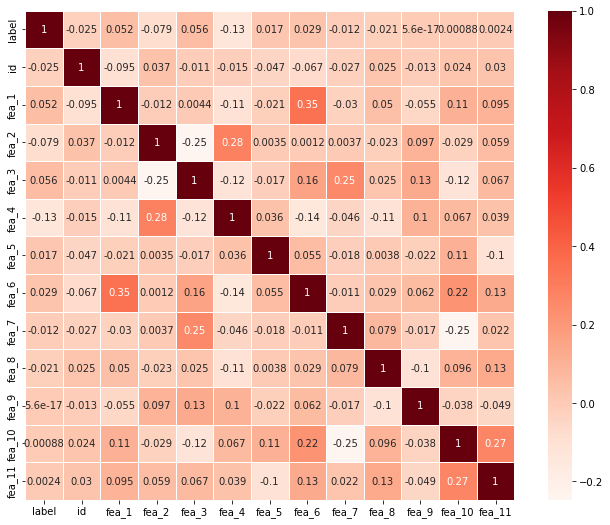

In [11]:
#Correlation Matrix

correlation_matrix = cust_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap=plt.cm.Reds)
plt.show()

In [12]:
y=cust_df["label"]
x=cust_df.copy()
x.drop(columns=["label"],inplace=True)
x.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [13]:
#handeling missing data (replace all missing values with mean value of that column)
x["fea_2"].fillna(x["fea_2"].mean(),inplace=True)
print(x.isnull().sum())
print(x.shape,y.shape)

id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64
(1125, 12) (1125,)


Confusion matrix accuracy is not meaningful for unbalanced classification,since the dataset is unbalanced.so make it balanced before building a model

### Balancing the dataset

In [14]:
os =  RandomOverSampler(0.7)
X_train_res, y_train_res = os.fit_resample(x, y)
print(" New 'x' has",X_train_res.shape,"        New 'Y' has",y_train_res.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

 New 'x' has (1530, 12)         New 'Y' has (1530,)
Original dataset shape Counter({0: 900, 1: 225})
Resampled dataset shape Counter({0: 900, 1: 630})


In [15]:
#np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, train_size = 0.70, test_size = 0.30, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
# predictions
y_pred =forest_model.predict(X_test)
print(y_pred)

[0.06 0.53 0.12 1.   0.31 0.19 0.48 0.01 0.4  0.67 0.75 0.42 1.   0.94
 0.16 0.32 0.24 0.92 0.86 0.25 0.17 0.23 0.42 0.74 0.35 0.2  0.87 0.03
 0.73 0.71 0.72 0.99 0.24 0.72 0.92 0.37 0.2  0.19 0.97 0.24 0.29 0.63
 0.23 0.26 0.73 0.28 0.92 0.18 0.15 0.2  0.24 0.46 0.15 0.11 0.98 0.64
 0.95 0.24 0.72 0.15 0.37 0.4  0.98 0.43 0.61 0.37 0.92 0.57 0.25 0.21
 0.33 0.74 0.37 0.29 0.68 0.07 0.95 0.1  0.2  0.81 0.44 0.99 0.97 0.43
 0.2  0.09 0.14 0.95 0.13 0.31 0.23 0.16 0.11 0.72 0.87 0.33 0.64 0.04
 0.63 0.32 0.9  0.17 0.37 0.08 0.92 0.95 0.97 0.11 0.63 0.39 0.92 0.99
 0.17 0.84 0.13 0.68 0.36 0.96 0.3  0.9  0.17 0.2  0.94 0.83 0.05 0.18
 0.25 0.38 0.37 0.05 0.2  0.16 0.45 0.37 0.57 0.33 0.14 0.9  0.68 0.99
 0.25 0.21 0.11 0.73 0.17 0.13 0.27 0.62 0.84 0.08 0.99 0.53 0.37 0.3
 0.75 0.62 0.67 0.76 0.41 0.16 0.22 0.41 0.99 0.16 0.14 0.12 0.49 0.13
 0.3  0.16 0.71 0.75 0.31 0.48 0.46 0.1  0.68 0.64 0.51 0.89 0.99 0.98
 0.99 0.74 0.88 0.32 0.26 0.79 0.75 1.   0.31 0.68 0.83 0.84 0.52 0.13
 0.24 0

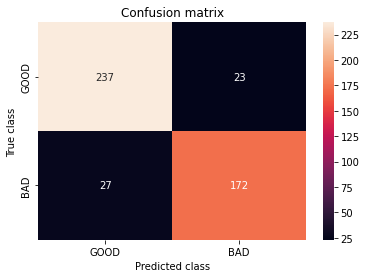

In [17]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [18]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print('Accuracy Score :',accuracy_score(y_test, y_pred.round()))
print(classification_report(y_test, y_pred.round()))

Random Forest: 452
Accuracy Score : 0.8910675381263616
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       260
           1       0.88      0.86      0.87       199

    accuracy                           0.89       459
   macro avg       0.89      0.89      0.89       459
weighted avg       0.89      0.89      0.89       459



<Figure size 648x504 with 0 Axes>

In [19]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred.round())*100, recall_score(y_test, y_pred.round())*100, precision_score(y_test, y_pred.round())*100, f1_score(y_test, y_pred.round())*100],
            index = ['accuracy', 'recall', 'precision', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,89.106754
recall,86.432161
precision,88.205128
f1_score,87.309645
